### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neuropy import plotting
from scipy.ndimage import gaussian_filter1d
from neuropy import plotting
from scipy import stats
import subjects
import pandas as pd

### Firing rate comparision, MAZE vs REMAZE

In [2]:
sessions = subjects.remaze_sess()

In [3]:
frate_df = []
for sub, sess in enumerate(sessions):
    maze = sess.paradigm["maze"].flatten()
    remaze = sess.paradigm["re-maze"].flatten()
    neurons = sess.neurons_stable.get_neuron_type("pyr")

    maze_frate = neurons.time_slice(*maze).firing_rate
    remaze_frate = neurons.time_slice(*remaze).firing_rate

    df = pd.DataFrame(dict(maze=maze_frate, remaze=remaze_frate, grp=sess.tag))
    frate_df.append(df)

frate_df = pd.concat(frate_df, ignore_index=True)

SpearmanrResult(correlation=0.7659126939230587, pvalue=1.5583083537622901e-58)
SpearmanrResult(correlation=0.7494477471833223, pvalue=2.9600405340252613e-43)


meta NOT subset; don't know how to subset; dropped


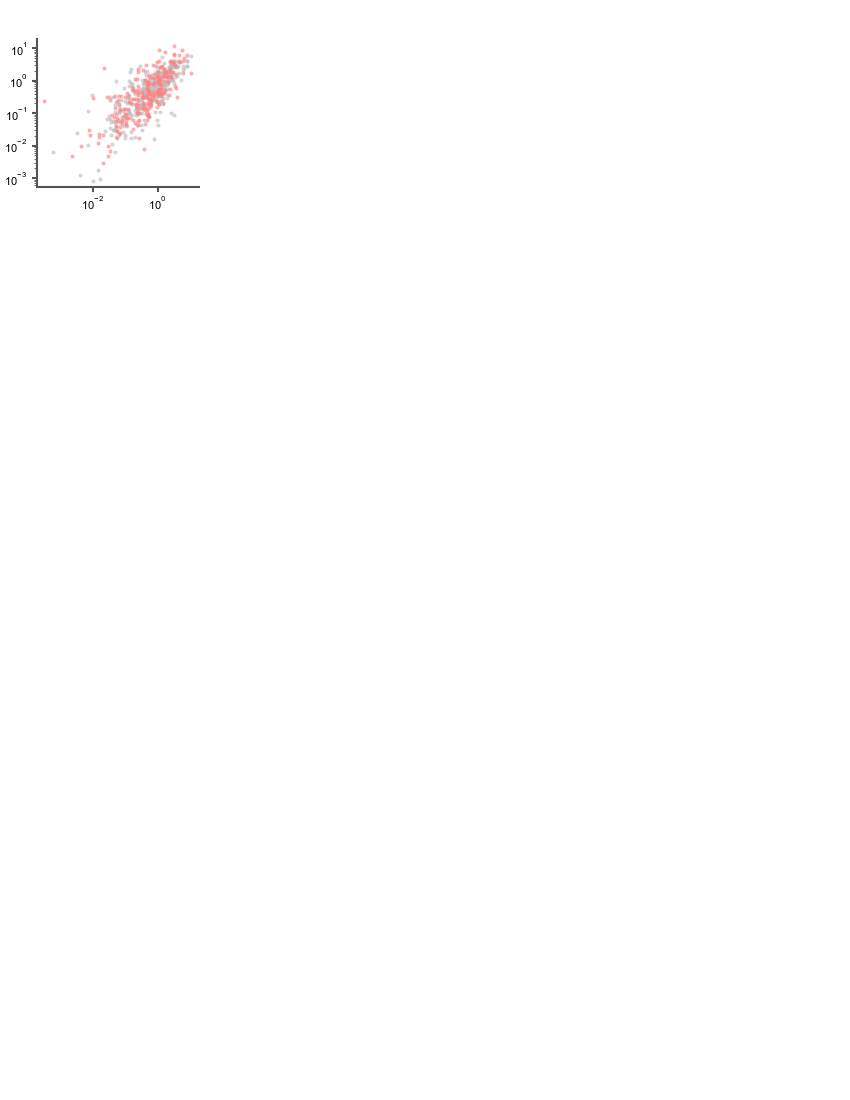

In [5]:
fig = plotting.Fig(grid=(5, 5))


for g, grp in enumerate(["NSD", "SD"]):
    df = frate_df[frate_df["grp"] == grp]
    x = df.maze.values
    y = df.remaze.values

    linfit = stats.spearmanr(x, y)
    # slope,intercept = linfit.slope,linfit.intercept
    print(linfit)

    col = subjects.colors_sd(1)[g]
    ax = fig.subplot(fig.gs[0])
    # ax.scatter(np.log10(x),np.log10(y),c=col,s=10,alpha=0.5)
    ax.scatter(x, y, c=col, s=4, alpha=0.5, rasterized=True)

    # a, b = np.log10(x), np.log10(y)
    # mask = ~np.isnan(a) & ~np.isnan(b)
    # print(stats.pearsonr(a[mask], b[mask]))

    # ax.plot(x,slope*x+intercept,color=col)
    # ax.axline((0,0),slope=1)
    # ax.plot([1,1],[100,100])

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_aspect("equal")

fig.savefig(subjects.figpath_sd / "remaze_firing_rate")